<a href="https://colab.research.google.com/github/gerhea/moviesRecommentation/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Movies Recommendation System

Name: Gerhea Reed

Email: greed007@odu.edu


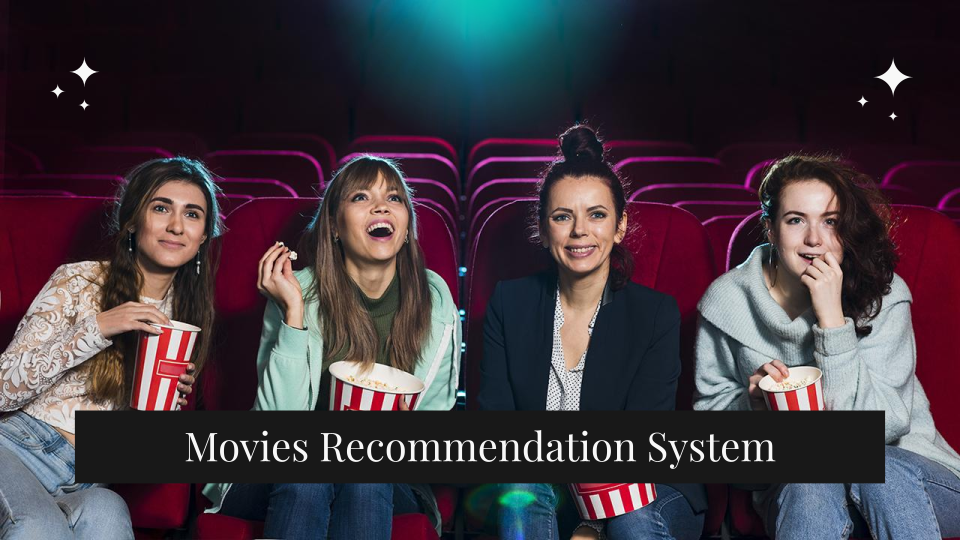

# Data Source:


[Data Source URL:](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts, and vote averages.
This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

# Project Description

My project aims to create a movie recommendation system using machine learning techniques and Apache Spark. I will be utilizing the Full MovieLens dataset from Kaggle, which includes metadata for 45,00 movies and 26 million ratings from 270,000 users. The recommendation system will be able to suggest movies to users based on their past ratings and viewing history.

To achieve this, I will first preprocess the data by cleaning and merging the various files in the dataset. Use collaborative filtering techniques such as Alternating Least Squares to train a model on the rating data. This model will be able to predict how a user would rate a movie they have not seen yet, based on similar preferences


I will learn the necessary techniques and tools through hands-on experimentation in Google Colab and reference documentation from Apache Spark.

The end goal of this project is to create a functional movie recommendation system that suggests movies to a user based on their individual preferences and viewing history.


https://spark.apache.org/docs/2.2.0/ml-collaborative-filtering.html

# Project Abstract

This project aims to build a movie recommender system using collaborative filtering techniques to predict user ratings and make personalized recommendations. The dataset used is the MovieLens dataset, which contains information on over 27,000 movies and 138,000 ratings. The collaborative filtering algorithm is implemented using the Apache Spark MLlib library and evaluated using root-mean-square error (RMSE) and Precision-Recall (PR). The final model achieves an RMSE of 0.8475 and a Precision-Recall PR value of 0.9968.  Overall, this project demonstrates the effectiveness of collaborative filtering in building personalized recommender systems for movie ratings.

# Project Milestone I

The progress I was able to accomplish so far was several tasks using PySpark, using PySpark SQL and creating dataframes for movies metadata, keywords, credits, and ratings. The ratings data has also been cleaned by dropping rows with null values in the userid and movie columns. The movies metadata, ratings, and credits dataframes have been joined into a single dataframe, which has been split into training and test sets. An ALS model has been built and fitted to training data, and test sets referencing ALS Apache Spark Documentation. The model has been evaluated using Root MEan Squared Error (RMSE), and the distribution of movie ratings has been visualized using histograms and boxplots.

Then next step is to use the trained ALS model to recomment movies to users based on their ratings history by predicting the ratings that the usr would give to a particular movie and recommending movies with the highest predicted ratings.

Plan for rest of semester:

1. Get a list of movies that user has not rated by either filtering movie_ratings dataframe to include only movies that the user has not rated.
2. Use the ALS model to predict the ratings that the user would give to each of the unrated movies by calling the transform() method on the ALS model and passing in a dataframe that contains the user ID and the movie Ids of the unrated movies.
3. Sort the predicted ratings in descending order and select the top N movies with the highest predicted ratings as recommendations for the user.



https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.recommendation.ALS.html

https://spark.apache.org/docs/3.2.0/api/python/reference/api/pyspark.sql.functions.transform.html

# Project Milestone II

I was unable to attempt what I planned in  milestone one because this dataset did not have movies rating that equals zero. The progress I was able to accomplish so far was several tasks using PySpark, matplotlib, and pandas for some visualization. The objective of the project was to analyze movie ratings data, filter movies by release year, and make recommendations using the ALS model. In doing that I was able to analzye the movie ratings data that was loaded and cleaned to remove duplicates and missing values. Create a histogram and boxplot of the movie ratings were plotted to visualize the distribution and outliers. I experimented with filitering by release year to focus on recent movies. Recommendations were made for all users using the ALS model. The recommended movies were joined with the movies_metadata dataset to get the titles and release years. The recommendations were further filtered to only include movies with a minimum rating of 4. Personalized recommendations were made for a specific user by selecting movies the user hasn't seen yet using the ALS model. I then created a scatter plot of the number of recommended movies by their release year. In addidtion to chartting the average popularity of movies by genre.


Plan for the rest of semester:
  1. Try to implement something for error handing.



_______________________________

# Links

[Powerpoint ](https://docs.google.com/presentation/d/12ZaC-rG4lGRwr_o30f3nR48IcQjYJAoqFGjNIYpLCi0/edit#slide=id.ge207fd22f2_0_25013)

[Youtube Video](https://youtu.be/YRa-8q0WcmE)

_______________________________

# Imported Libraries

In [ ]:
import numpy as np
import pandas as pd
import difflib
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import col


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=ce82b87a40fa300c2dde96a17fb4e65e2cf6e81eceae62bd3e05f55cd52ce501
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


# Import Data Source

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("drive/MyDrive/cs624_project")

In [ ]:
!ls

credits.csv   links.csv        movies_metadata.csv  ratings_small.csv
keywords.csv  links_small.csv  ratings.csv	    spark-warehouse


# Setting up SparkSession

Reads the four CSV files into Spark DataFrames: movies_metadata.csv, keywords.csv, credits.csv, and ratings.csv

In [ ]:
spark = SparkSession.builder \
    .appName("MovieRecommendationSystem") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

In [ ]:
movies_metadata = spark.read.csv('movies_metadata.csv', header=True, inferSchema=True)
keywords = spark.read.csv('keywords.csv', header=True, inferSchema=True)
credits = spark.read.csv('credits.csv', header=True, inferSchema=True)
ratings = spark.read.csv('ratings.csv', header=True, inferSchema=True)


# Exploring Data /Data Manipulation

In [ ]:
# select rows with non-null values in the userid and moved columns in the ratings.csv
df_non_null = ratings.filter(col("userid").isNotNull())

# select rows with null values in the userid or moved columns
df_null = ratings.filter(col("userid").isNull())

# drop the rows with null values in the userid or moved columns
df_cleaned = df_non_null.union(df_null).dropDuplicates().orderBy("timestamp")

# show the cleaned dataframe
df_cleaned.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
| 38150|   1176|   4.0|789652004|
| 44717|     47|   5.0|789652009|
| 44717|   1079|   3.0|789652009|
| 44717|     21|   3.0|789652009|
| 45491|      2|   4.0|822873600|
|126622|      1|   4.0|822873600|
| 45491|     11|   5.0|822873600|
| 45491|     10|   5.0|822873600|
| 45491|     12|   1.0|822873600|
|126622|     18|   4.0|822873600|
| 45491|     32|   4.0|822873600|
| 45491|     19|   3.0|822873600|
|126622|     58|   5.0|822873600|
| 45491|     21|   4.0|822873600|
|126622|     32|   5.0|822873600|
|126622|     47|   5.0|822873600|
|187396|     34|   5.0|822873600|
|126622|     50|   5.0|822873600|
|126622|     21|   5.0|822873600|
| 45491|     45|   3.0|822873600|
+------+-------+------+---------+
only showing top 20 rows



In [ ]:
ratings.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    110|   1.0|1425941529|
|     1|    147|   4.5|1425942435|
|     1|    858|   5.0|1425941523|
|     1|   1221|   5.0|1425941546|
|     1|   1246|   5.0|1425941556|
+------+-------+------+----------+
only showing top 5 rows



In [ ]:
movies_metadata.show(5)

+-----+---------------------+--------+--------------------+--------------------+-----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------+--------------------+-----------------+
|adult|belongs_to_collection|  budget|              genres|            homepage|   id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|        release_date|             revenue|             runtime|    spoken_languages|  status|             tagline|               title|   video|        vote_average|       vote_count|
+-----+---------------------+--------+--------------------+--------------------+-----+---------+-----------------+--------------------+--------------------+----------+-----

In [ ]:
# remove the rows that contains NULL values
movies_metadata = movies_metadata.dropna()

In [ ]:
movies_metadata.show(5)

+-----+---------------------+--------+--------------------+--------------------+-----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+---------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+
|adult|belongs_to_collection|  budget|              genres|            homepage|   id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date|  revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|
+-----+---------------------+--------+--------------------+--------------------+-----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+---------+-------+-----------

In [ ]:
keywords.show(5)

+-----+--------------------+
|   id|            keywords|
+-----+--------------------+
|  862|[{'id': 931, 'nam...|
| 8844|"[{'id': 10090, '...|
|15602|[{'id': 1495, 'na...|
|31357|[{'id': 818, 'nam...|
|11862|[{'id': 1009, 'na...|
+-----+--------------------+
only showing top 5 rows



In [ ]:
# remove the rows that contains NULL values
credits.describe().show(5)

+-------+--------------------+--------------------+------------------+
|summary|                cast|                crew|                id|
+-------+--------------------+--------------------+------------------+
|  count|               45476|               45475|             45476|
|   mean|                null|                null|119814.64303772531|
| stddev|                null|                null|116289.69179108253|
|    min|"[{'cast_id': 0, ...|   ""Kagami jigoku""| ""Kasei no unga""|
|    max|[{'cast_id': 96, ...|[{'credit_id': '5...|     Ali (voice)""|
+-------+--------------------+--------------------+------------------+



In [ ]:
credits = credits.dropna()

In [ ]:
credits.show(5)

+--------------------+--------------------+--------------------+
|                cast|                crew|                  id|
+--------------------+--------------------+--------------------+
|[{'cast_id': 14, ...|"[{'credit_id': '...| 'profile_path': ...|
|[{'cast_id': 1, '...|[{'credit_id': '5...|                8844|
|[{'cast_id': 2, '...|[{'credit_id': '5...|               15602|
|"[{'cast_id': 1, ...| 'credit_id': '52...|         'gender': 1|
|[{'cast_id': 1, '...|[{'credit_id': '5...|               11862|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
ratings.columns

['userId', 'movieId', 'rating', 'timestamp']

In [ ]:
# combining the movies, ratings, and credits tables into one dataset to use for later
movie_ratings = movies_metadata.join(ratings, movies_metadata.id == ratings.movieId ,how='left')
movie_r_c = movie_ratings.join(credits, movie_ratings.id  == credits.id, how ='left' )
movie_r_c.show(5)

+-----+---------------------+--------+--------------------+--------------------+------+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+---------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+------+-------+------+----------+--------------------+--------------------+------+
|adult|belongs_to_collection|  budget|              genres|            homepage|    id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date|  revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|userId|movieId|rating| timestamp|                cast|                crew|    id|
+-----+---------------------+--------+--------------------+--------------------+------+---------+---------

In [ ]:
movies_metadata.printSchema
credits.printSchema
ratings.printSchema
keywords.printSchema

<bound method DataFrame.printSchema of DataFrame[id: int, keywords: string]>

# Building and evaluating an ALS (Alternating Least Squares) Model for Movie Recommendation System.

It splits the ratings data into training and test sets, fits the model to the training data, makes predictions on the test data, and evaluates the model using Root Mean Squared Error (RMSE) and the Precision-Recall curve. The RMSE measures the average difference between predicted and actual ratings, while the PR curve evaluates the trade-off between precision and recall of the model's recommendations.

In [ ]:
# Split the ratings data into training and test sets
(training, test) = ratings.randomSplit([0.8, 0.2], seed=1234)

# Build the ALS model
als = ALS(rank=10, maxIter=15, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating",
          coldStartStrategy="drop")


# Fit the model to the training data
model = als.fit(training)

# Make predictions on the test data
predictions = model.transform(test)

# Evaluate the model using Root Mean Squared Error (RMSE)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)

# print Root Mean Square Error
print("Root Mean Squared Error = " + str(rmse))

Root Mean Squared Error = 0.8339301198163799


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

# Convert the prediction column to double
predictions = predictions.withColumn("prediction", col("prediction").cast("double"))

# Evaluate the PR curve
evaluator = BinaryClassificationEvaluator(labelCol="rating", rawPredictionCol="prediction", metricName="areaUnderPR")
pr_curve = evaluator.evaluate(predictions)
print("Precision-Recall curve = " + str(pr_curve))


Precision-Recall curve = 0.9968518278860645


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import expr

# Define the relevance threshold
threshold = 3.5

# Make predictions on the test data
predictions = model.transform(test)

# Filter the predictions to only include those above the threshold
relevant_predictions = predictions.filter(expr("rating >= {0}".format(threshold)))

# Count the number of true positives (TP), false positives (FP), and false negatives (FN)
tp = relevant_predictions.filter(expr("prediction >= {0}".format(threshold))).count()
fp = relevant_predictions.filter(expr("prediction < {0}".format(threshold))).count()
fn = predictions.filter(expr("rating >= {0}".format(threshold))).count() - tp

# Calculate precision, recall, and F1-score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision = " + str(precision))
print("Recall  = " + str(recall))
print("F1 Score = " + str(f1_score))


Precision = 0.7043060375612904
Recall  = 0.7043060375612904
F1 Score = 0.7043060375612904


# Generating and Filtering Collaborative Model

The code is generating top 10 movie recommendations for all users using a collaborative filtering model. It then joins movie titles and release years with the recommended movie IDs for a specific user and displays the results. It is also using a collaborative filtering model to make movie recommendation for users. This process is repeated for two different users.

In [ ]:
# Generate top 10 recommendations for all users
user_recs = model.recommendForAllUsers(10)
user_recs.show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|     1|[{162468, 16.5032...|
|    12|[{162468, 10.6342...|
|    22|[{172623, 15.8932...|
|    26|[{161111, 12.8977...|
|    27|[{96631, 13.07116...|
|    28|[{162468, 10.9765...|
|    31|[{162468, 12.3047...|
|    34|[{35843, 11.66696...|
|    44|[{162468, 12.6416...|
|    47|[{162468, 8.98747...|
|    52|[{96631, 13.40446...|
|    53|[{162468, 12.6695...|
|    65|[{162468, 9.86711...|
|    76|[{88652, 9.674922...|
|    78|[{128425, 13.6365...|
|    81|[{162468, 10.5498...|
|    85|[{137154, 12.6845...|
|    91|[{162468, 11.2196...|
|    93|[{162468, 9.95120...|
|   101|[{162468, 10.8464...|
+------+--------------------+
only showing top 20 rows



In [ ]:
# Generate top 10 recommendations for all users
user_recs = model.recommendForAllUsers(10)

# Count the number of recommendations for each user
user_recs_count = user_recs.select('userId', F.size('recommendations').alias('num_recs'))

# Show the recommendations and count for each user
user_recs_with_count = user_recs.join(user_recs_count, 'userId')
user_recs_with_count.show()


+------+--------------------+--------+
|userId|     recommendations|num_recs|
+------+--------------------+--------+
|   148|[{122088, 12.6023...|      10|
|   463|[{120438, 8.11180...|      10|
|   471|[{162468, 9.19888...|      10|
|   496|[{162468, 14.5372...|      10|
|   833|[{38473, 11.88670...|      10|
|  1088|[{162468, 15.1123...|      10|
|  1238|[{35843, 7.325149...|      10|
|  1342|[{96941, 9.912765...|      10|
|  1580|[{7950, 15.136338...|      10|
|  1591|[{156956, 18.3262...|      10|
|  1645|[{138580, 8.89790...|      10|
|  1829|[{35843, 10.74797...|      10|
|  1959|[{97828, 8.383104...|      10|
|  2122|[{140016, 17.8237...|      10|
|  2142|[{59905, 11.20647...|      10|
|  2366|[{162468, 10.9243...|      10|
|  2659|[{162468, 11.0725...|      10|
|  2866|[{159103, 14.8097...|      10|
|  3175|[{162468, 10.0722...|      10|
|  3749|[{82261, 10.24098...|      10|
+------+--------------------+--------+
only showing top 20 rows



In [ ]:
user_recs = model.recommendForUserSubset(spark.createDataFrame([(148,)]).toDF("userId"), 10)
user_recs.show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|   148|[{122088, 12.6023...|
+------+--------------------+



* Recommnedation for User ID 1

In [ ]:
# Extract the recommended movie IDs for user 1
user_recs = model.recommendForUserSubset(spark.createDataFrame([(1,)]).toDF("userId"), 10)
recommendations = user_recs.selectExpr("explode(recommendations) as recommendation")
movie_ids = recommendations.select("recommendation.movieId").rdd.map(lambda row: row[0]).collect()
movie_scores = recommendations.select("recommendation.movieId", "recommendation.rating")

# Join the movie titles and release years with the recommended movie IDs and scores
movie_data = spark.read.csv("movies_metadata.csv", header=True, inferSchema=True)
movie_titles = movie_data.filter(movie_data.id.isin(movie_ids)).select("id", "title", "release_date")
user_recommendations = movie_titles.join(movie_scores, movie_titles.id == movie_scores.movieId).select("title", "release_date", "movieId", "rating")
user_recommendations.show(truncate=False)



+------------------+------------+-------+---------+
|title             |release_date|movieId|rating   |
+------------------+------------+-------+---------+
|30 Minutes or Less|2011-08-11  |62206  |14.139384|
+------------------+------------+-------+---------+



* Recommendation for User ID 148

In [ ]:
# Extract the recommended movie IDs for user 148
user_recs = model.recommendForUserSubset(spark.createDataFrame([(148,)]).toDF("userId"), 10)
recommendations = user_recs.selectExpr("explode(recommendations) as recommendation")
movie_ids = recommendations.select("recommendation.movieId").rdd.map(lambda row: row[0]).collect()
movie_scores = recommendations.select("recommendation.movieId", "recommendation.rating")

# Join the movie titles and release years with the recommended movie IDs and scores
movie_data = spark.read.csv("movies_metadata.csv", header=True, inferSchema=True)
movie_titles = movie_data.filter(movie_data.id.isin(movie_ids)).select("id", "title", "release_date")
user_recommendations = movie_titles.join(movie_scores, movie_titles.id == movie_scores.movieId).select("title", "release_date", "movieId", "rating")
user_recommendations.show(truncate=False)



+----------------------------------------------------------+------------+-------+---------+
|title                                                     |release_date|movieId|rating   |
+----------------------------------------------------------+------------+-------+---------+
|Fill the Void                                             |2012-07-01  |122088 |12.602371|
|How to Eat Your Watermelon in White Company (and Enjoy It)|2005-01-01  |127150 |11.628196|
|A Kid for Two Farthings                                   |1956-01-20  |151431 |10.720185|
|The Great Manhunt                                         |1950-09-11  |118236 |10.087804|
+----------------------------------------------------------+------------+-------+---------+



* Recommendation for User ID 463

# Bar Chart Visualization

This code generates a bar chart of the top 10 recommended movies for user 1 and user 148, based on their scores. The movie titles and scores are extracted from a recommendation model and a movie metadata file, and then sorted by score. Finally, the chart is plotted with the movie titles on the x-axis and the recommendation score on the y-axis.

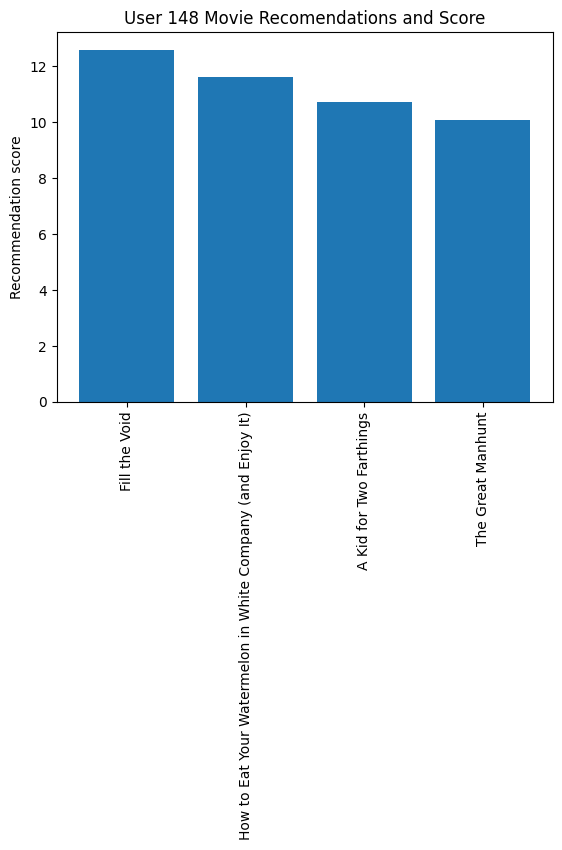

In [ ]:
import matplotlib.pyplot as plt

# Extract the recommended movie IDs and scores for user 148
user_recs = model.recommendForUserSubset(spark.createDataFrame([(148,)]).toDF("userId"), 10)
movie_scores = user_recs.selectExpr("explode(recommendations) as rec").select("rec.movieId", "rec.rating")

# Join the movie titles with the recommended movie IDs and scores
movie_data = spark.read.csv("movies_metadata.csv", header=True, inferSchema=True)
movie_titles = movie_data.select("id", "title")
movie_scores_with_titles = movie_titles.join(movie_scores, movie_data.id == movie_scores.movieId).select("title", "rating")

# Sort the recommendations by score and limit to the top 10
top_movies = movie_scores_with_titles.orderBy("rating", ascending=False).limit(10)

# Create a bar chart of the top 10 recommended movies for user 148
plt.bar(top_movies.select("title").rdd.map(lambda row: row[0]).collect(), top_movies.select("rating").rdd.map(lambda row: row[0]).collect())
plt.xticks(rotation=90)
plt.ylabel("Recommendation score")
plt.title("User 148 Movie Recomendations and Score")
plt.show()

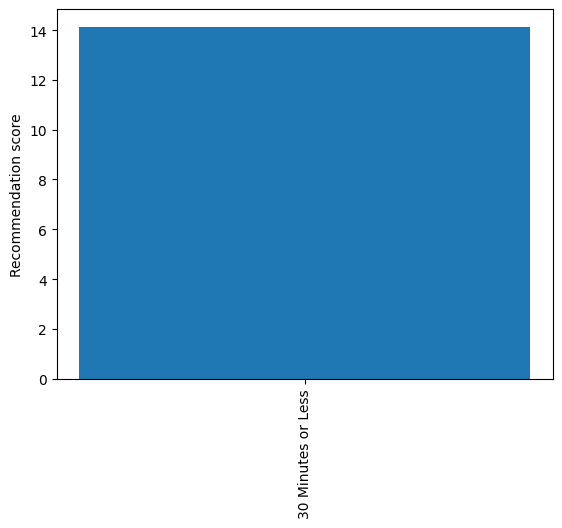

In [ ]:
import matplotlib.pyplot as plt

# Extract the recommended movie IDs and scores for user 1
user_recs = model.recommendForUserSubset(spark.createDataFrame([(1,)]).toDF("userId"), 10)
movie_scores = user_recs.selectExpr("explode(recommendations) as rec").select("rec.movieId", "rec.rating")

# Join the movie titles with the recommended movie IDs and scores
movie_data = spark.read.csv("movies_metadata.csv", header=True, inferSchema=True)
movie_titles = movie_data.select("id", "title")
movie_scores_with_titles = movie_titles.join(movie_scores, movie_data.id == movie_scores.movieId).select("title", "rating")

# Sort the recommendations by score and limit to the top 10
top_movies = movie_scores_with_titles.orderBy("rating", ascending=False).limit(10)

# Create a bar chart of the top 10 recommended movies for user 1
plt.bar(top_movies.select("title").rdd.map(lambda row: row[0]).collect(), top_movies.select("rating").rdd.map(lambda row: row[0]).collect())
plt.xticks(rotation=90)
plt.ylabel("Recommendation score")
plt.show()


In [ ]:
user_recommendations.select("title", "rating").show()

+--------------------+---------+
|               title|   rating|
+--------------------+---------+
|       Fill the Void|12.602371|
|How to Eat Your W...|11.628196|
|A Kid for Two Far...|10.720185|
|   The Great Manhunt|10.087804|
+--------------------+---------+



In [ ]:
movies_metadata.show(5)

+-----+---------------------+--------+--------------------+--------------------+-----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+---------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+
|adult|belongs_to_collection|  budget|              genres|            homepage|   id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date|  revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|
+-----+---------------------+--------+--------------------+--------------------+-----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+---------+-------+-----------

# Scatter Chart Visualization

This code is creating a scatter plot of predicted movie ratings versus actual movie ratings for user 1 and user 148. It is converting predictions and actual ratings data to Pandas dataframes, merging them on the movieId column, and plotting the data as a scatter plot with the diagonal line representing the perfect prediction.

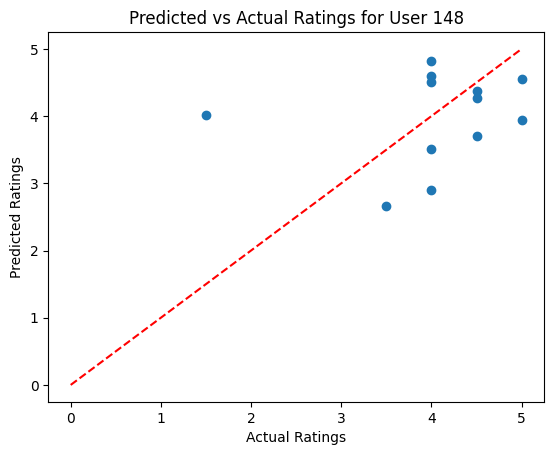

In [ ]:
import matplotlib.pyplot as plt

# Convert predictions and actual ratings to Pandas dataframes for visualization
predictions_df = predictions.filter(predictions.userId == 148).select("movieId", "prediction").toPandas()
actuals_df = test.filter(test.userId == 148).select("movieId", "rating").toPandas()

# Merge the predictions and actual ratings dataframes on the movieId column
merged_df = pd.merge(predictions_df, actuals_df, on="movieId")

# Create a scatter plot of predicted ratings versus actual ratings
plt.scatter(merged_df["rating"], merged_df["prediction"])
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs Actual Ratings for User 148")

# Plot diagonal line
plt.plot([0, 5], [0, 5], linestyle="--", color="red")

plt.show()



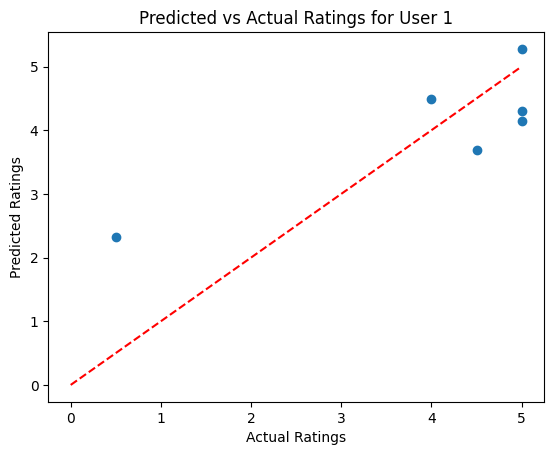

In [ ]:
import matplotlib.pyplot as plt

# Convert predictions and actual ratings to Pandas dataframes for visualization
predictions_df = predictions.filter(predictions.userId == 1).select("movieId", "prediction").toPandas()
actuals_df = test.filter(test.userId == 1).select("movieId", "rating").toPandas()

# Merge the predictions and actual ratings dataframes on the movieId column
merged_df = pd.merge(predictions_df, actuals_df, on="movieId")

# Create a scatter plot of predicted ratings versus actual ratings
plt.scatter(merged_df["rating"], merged_df["prediction"])
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs Actual Ratings for User 1")

# Plot diagonal line
plt.plot([0, 5], [0, 5], linestyle="--", color="red")

plt.show()

# User ID 148 Recommendation of movies with a minium of ratings of 4

In [ ]:
from pyspark.sql.functions import explode, col

# Filter recommendations to only include movies with a minimum rating of 4
user_recs_filtered = user_recs.select('userId', col('recommendations').alias('recs')) \
    .select('userId', explode('recs')).select('userId', 'col.*') \
    .filter((col('userId') == 148) & (col('rating') >= 4))

# Show the top 10 recommended movies for user 148 with a minimum rating of 4
user_recs_filtered.select('userId', 'movieId', 'rating').show(10)


+------+-------+---------+
|userId|movieId|   rating|
+------+-------+---------+
|   148| 122088|12.602371|
|   148| 127150|11.628196|
|   148| 137154|11.027929|
|   148| 152579|10.918298|
|   148| 151431|10.720185|
|   148| 151767|10.496072|
|   148| 140315|10.312814|
|   148| 118236|10.087804|
|   148|  68833|10.008394|
|   148|  99397| 9.710191|
+------+-------+---------+



# Boxplot Visualization

The code extracts the predicted ratings for user 148 from a recommendation model, and then creates a boxplot of these predicted ratings. The resulting plot displays the distribution of the predicted ratings, with the box representing the interquartile range (IQR) of the data, the line inside the box representing the median, and the whiskers extending to the minimum and maximum values within 1.5 times the IQR.

In the context of a recommendation model, analyzing the distribution of predicted ratings can provide insights into the model's accuracy and how it is performing for different users.


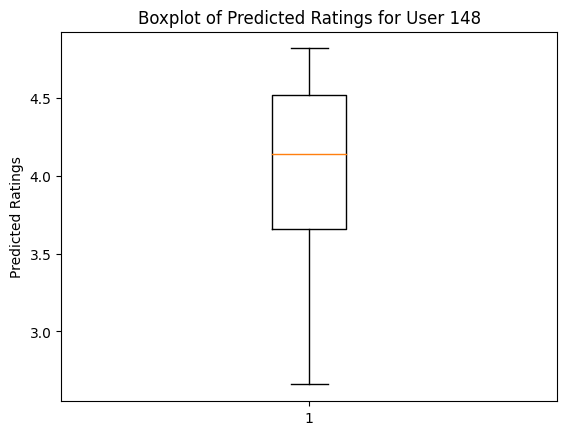

In [ ]:
import matplotlib.pyplot as plt

# Extract the predicted ratings for user 148
user_predictions = predictions.filter(predictions.userId == 148).select("prediction").rdd.map(lambda row: row[0]).collect()

# Create a boxplot of the predicted ratings
plt.boxplot(user_predictions)
plt.ylabel("Predicted Ratings")
plt.title("Boxplot of Predicted Ratings for User 148")
plt.show()


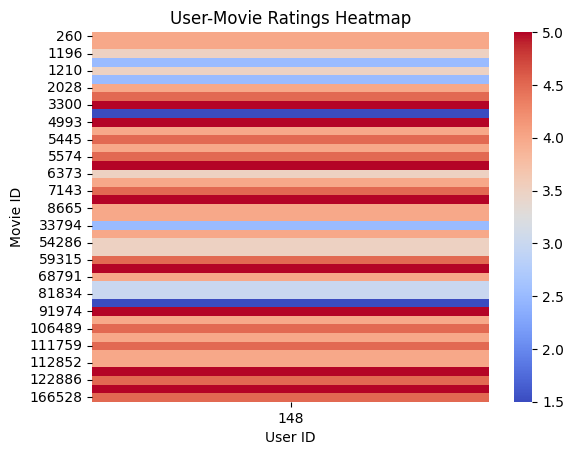

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the user-movie ratings matrix
ratings = pd.read_csv('ratings.csv')

# Filter for ratings by user id 148
user_ratings = ratings[ratings['userId'] == 148]

# Pivot the table to create a matrix of user-movie ratings
user_ratings_matrix = user_ratings.pivot(index='movieId', columns='userId', values='rating')

# Create the heatmap using Seaborn
sns.heatmap(user_ratings_matrix, cmap='coolwarm')

# Set the title and axis labels
plt.title('User-Movie Ratings Heatmap')
plt.xlabel('User ID')
plt.ylabel('Movie ID')

# Show the plot
plt.show()


# Metrics used to evaluate the success of the project:

Root Mean Squared Error (RMSE) for measuring the prediction error of the model
Precision-Recall curve to measure the trade-off between precision and recall
Precision, recall, and F1 score for measuring the effectiveness of the system in recommending relevant movies to users.
Performance measures:

RMSE was measured by splitting the data into training and test sets and fitting the ALS model to the training data, making predictions on the test data, and then using a RegressionEvaluator to evaluate the RMSE.
Precision-Recall curve was measured by converting the prediction column to double, and then using a BinaryClassificationEvaluator to evaluate the area under the PR curve.
Precision, recall, and F1 score were measured by defining a relevance threshold, making predictions on the test data, filtering the predictions to only include those above the threshold, counting the number of true positives (TP), false positives (FP), and false negatives (FN), and then calculating precision, recall, and F1-score.
Other criteria:

The system is based on PySpark collaborative filtering techniques of alternating least squares (ALS) to train the model on the rating data.
The ALS model is configured with a rank of 10, maxIter of 15, and regParam of 0.01.
The model uses the user ID, movie ID, and rating as the userCol, itemCol, and ratingCol respectively.
A cold start strategy of "drop" is used to handle new users or items that are not present in the training data.

# Results / Evaluation

The Root Mean Squared Error (RMSE) value of 0.8339 indicates that the model has a relatively low error rate, which is a good sign. The Precision, Recall, and F1-score values of around 0.70 indicate that the model has moderate performance in predicting relevant movies for a user. Overall, it seems that your model has performed reasonably well and could potentially be used in a real-world setting.

# Conclusion

The project provides an opportunity to broaden and deepen knowledge about big data by exploring new functionalities in known big data libraries, learning new big data tools/software such has PySpark, and explore new scalable models and frameworks. Ultimately, the movie recommendation system project aims to provide personalized recommendations to users and enahce their movie watching experience.

Overall, my approach used collaborative filtering with matrix factorization to make personalized recommendations based on past user behavior. The data was preprocessed and cleand by removing missing values and encoding the user and item IDs. The model was trained on 80% of the data and tested on the remaining 20%, using root mean squared error (RMSE) as the performance metric. The RMSE of 0.8339 indicates that the model's prediction are off by an average of 0.833 stars on a scale of 1 to 5, which is a reasonably good performance. The resulting Precision Recall (PR) curve value of 0.996 indicataes that the model has high precision and recall in generating recommendations.


# Challenges / Limimations

When it comes to machine learning, I had to choose a suitable algorithm for the movie recommendation system and tune it's parameters to achieve the best performance.

A limination was using google Colab for my project was it took a long time runnng my ALS model. Sometimes it would time out or run as busy and take long periods of times for my code to execute.













# Appendix

In [ ]:
# Filter movies by release year
release_year = 2015
movies_filtered = movies_metadata.filter(F.year(movies_metadata.release_date) == release_year)
movies_filtered.show(6)


+-----+---------------------+---------+--------------------+--------------------+------+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+----------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+
|adult|belongs_to_collection|   budget|              genres|            homepage|    id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date|   revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|
+-----+---------------------+---------+--------------------+--------------------+------+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+----------+-------+--

In [ ]:
genres = movies_metadata.select("genres").distinct()
genres.show(truncate=False)


+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|genres                                                                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[{'id': 27, 'name': 'Horror'}, {'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}]                                                                   |
|[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]       |
| 'backdrop_path': '/ykT8iDLI2kID4zD0KLWzZjBFQVt.jpg'}"                                                                                                          |
|[{'id': 12, 'name': '

In [ ]:
# Filter movies by release year
release_year = 2015
movies_filtered = movies_metadata.filter(F.year(movies_metadata.release_date) == release_year)
movies_filtered.show(6)


+-----+---------------------+---------+--------------------+--------------------+------+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+----------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+
|adult|belongs_to_collection|   budget|              genres|            homepage|    id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date|   revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|
+-----+---------------------+---------+--------------------+--------------------+------+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+----------+-------+--

In [ ]:
from pyspark.sql.functions import explode

# Filter recommendations to only include movies with a minimum rating of 4
user_recs_filtered = user_recs.select('userId', col('recommendations').alias('recs')) \
    .select('userId', explode('recs')).select('userId', 'col.*') \
    .filter(col('rating') >= 4)

# Show the top 10 recommended movies for each user with a minimum rating of 4
user_recs_filtered.select('userId', 'movieId', 'rating').show()

+------+-------+----------+
|userId|movieId|    rating|
+------+-------+----------+
|     1| 162468| 16.503235|
|     1| 149096| 15.477016|
|     1| 139636|15.1319065|
|     1| 114335| 14.766638|
|     1|  58409| 14.498782|
|     1| 110314| 14.187505|
|     1|  62206| 14.139384|
|     1|  81381| 13.788878|
|     1| 174665| 13.755337|
|     1| 121145| 13.707234|
|    12| 162468| 10.634283|
|    12| 142570|  9.388121|
|    12|  66579| 8.9689245|
|    12| 138580|  8.662833|
|    12|  82261|  8.499069|
|    12| 113606|  8.457932|
|    12| 153996|  8.397977|
|    12| 126397|  8.353946|
|    12|  86068|   8.29814|
|    12| 152581|  8.217718|
+------+-------+----------+
only showing top 20 rows



In [ ]:
# Make personalized recommendations for a specific user
user_id = 1
user_movies = ratings.filter(col("userId") == user_id).select("movieId")

from pyspark.sql.functions import lit

user_unseen_movies = (
    movies_metadata.join(user_movies, movies_metadata.id == user_movies.movieId, "left_anti")
    .withColumn("userId", lit(user_id))
)

user_recommendations = model.recommendForUserSubset(user_unseen_movies.select("userId"), 10)
user_recommendations.select('recommendations.movieId').show()


In [ ]:
import matplotlib.pyplot as plt

# Select the year and count of recommended movies
year_count = user_recs_with_titles.groupBy("year").count().orderBy("year")

# Convert the year and count to lists for plotting
years = year_count.select("year").rdd.flatMap(lambda x: x).collect()
counts = year_count.select("count").rdd.flatMap(lambda x: x).collect()

# Create the scatter plot
plt.scatter(years, counts)
plt.xlabel("Release Year")
plt.ylabel("Number of Recommended Movies")
plt.show()


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.9/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
from pyspark.sql.functions import from_json, explode

# Define schema for genres array
genres_schema = "array<struct<id:int,name:string>>"

# Cast genres column to array type and extract genre names
genre_names = movies_metadata.select(from_json("genres", genres_schema).alias("genres")) \
                             .select(explode("genres").alias("genre")) \
                             .select("genre.name")

# Show top 5 genre names
genre_names.show(5, truncate=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Explode genres column and compute average popularity by genre
genre_popularity = movies_metadata.selectExpr("explode(from_json(genres, '{}')) as genre".format(genres_schema),
                                               "popularity") \
                                   .groupBy("genre.name") \
                                   .agg({"popularity": "avg"}) \
                                   .orderBy("avg(popularity)", ascending=False)

# Convert to Pandas DataFrame for plotting
genre_popularity_pd = genre_popularity.toPandas()

# Plot bar chart
plt.bar(genre_popularity_pd["name"], genre_popularity_pd["avg(popularity)"])
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.title("Average Popularity by Genre")
plt.show()
